In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
columns = ['buying','maintainace','doors','person','lugboot','safety','class']

In [16]:
df = pd.read_csv(r'E:\Machine learning\ML assignment\car_prediction\car.data', names= columns)

In [17]:
df.head()

,buying,maintainace,doors,person,lugboot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
df.shape

(1728, 7)

In [19]:
df.isna().sum()

buying         0
maintainace    0
doors          0
person         0
lugboot        0
safety         0
class          0
dtype: int64

In [20]:
df.dtypes

buying         object
maintainace    object
doors          object
person         object
lugboot        object
safety         object
class          object
dtype: object

In [21]:
def To_numeric(feature,df):
    df[feature] = pd.to_numeric(df[feature],errors= 'coerce')

In [23]:
#converting the doors and person to numeric
To_numeric('doors',df)
To_numeric('person',df)

In [24]:
df.dtypes

buying          object
maintainace     object
doors          float64
person         float64
lugboot         object
safety          object
class           object
dtype: object

In [26]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='class', ylabel='count'>

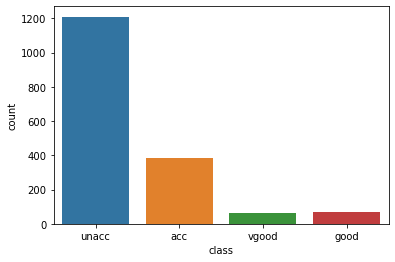

In [27]:
sns.countplot(df['class'])

In [28]:
# checking the relation of each column to classs

In [30]:
def catplot(feature):
    sns.catplot(kind='count',x=feature,data=df,hue='class')

In [33]:
df.columns

Index(['buying', 'maintainace', 'doors', 'person', 'lugboot', 'safety',
       'class'],
      dtype='object')

<Figure size 1440x2160 with 0 Axes>

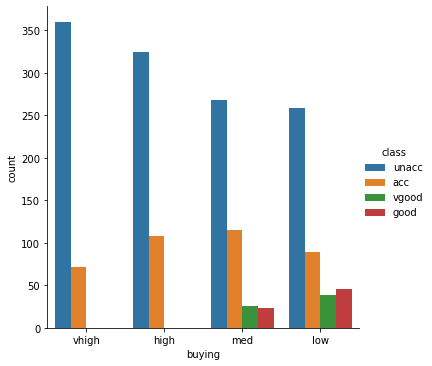

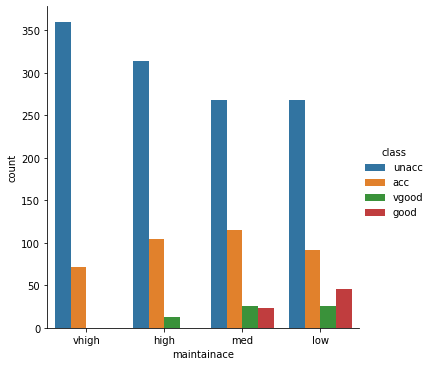

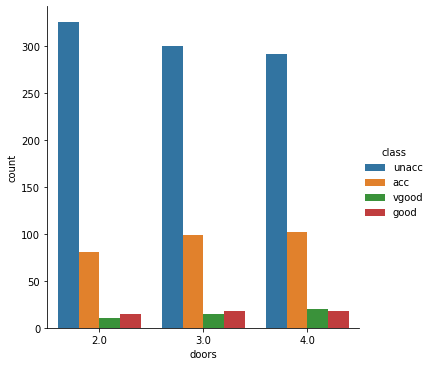

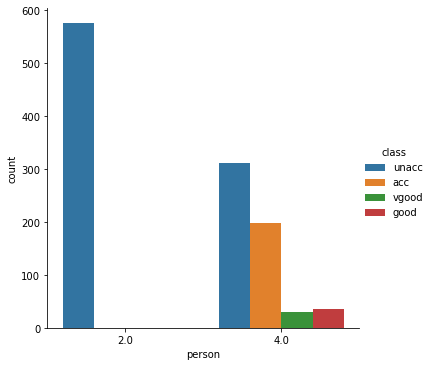

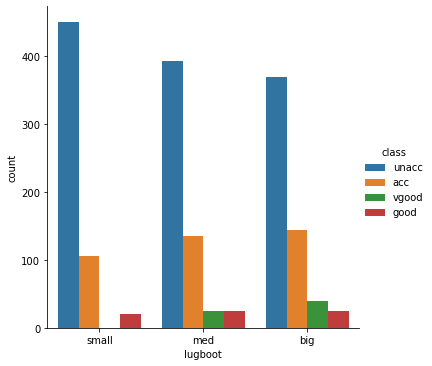

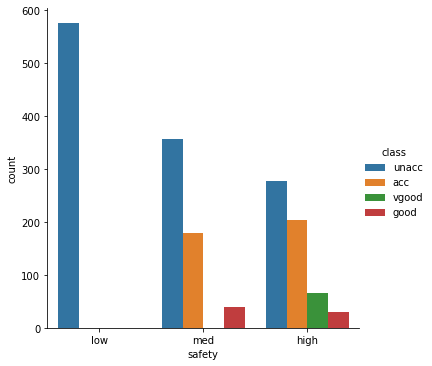

In [39]:
plt.figure(figsize=(20,30))
for feature in ['buying', 'maintainace', 'doors', 'person', 'lugboot', 'safety']:
    catplot(feature)

In [45]:
#sperate numerical and catergorical data
cat_col = [col for col in df.columns if df[col].dtype =='object']
num_col = [col for col in df.columns if df[col].dtype !='object']

In [49]:
cat_col

['buying', 'maintainace', 'lugboot', 'safety', 'class']

In [55]:
categorical_data = df[cat_col]

In [56]:
for i in categorical_data.columns:
    print('{} has total {} catagories'.format(i,len(categorical_data[i].value_counts())))

buying has total 4 catagories
maintainace has total 4 catagories
lugboot has total 3 catagories
safety has total 3 catagories
class has total 4 catagories


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
for i in categorical_data.columns:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])

In [61]:
categorical_data

,buying,maintainace,lugboot,safety,class
0,3,3,2,1,2
1,3,3,2,2,2
2,3,3,2,0,2
3,3,3,1,1,2
4,3,3,1,2,2
...,...,...,...,...,...
1723,1,1,1,2,1
1724,1,1,1,0,3
1725,1,1,0,1,2
1726,1,1,0,2,1


In [62]:
#checking outliers
def plot(df,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2) 

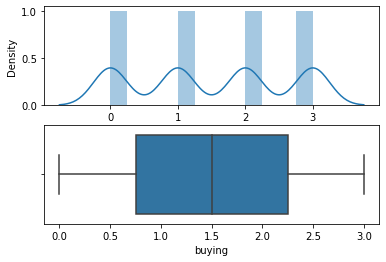

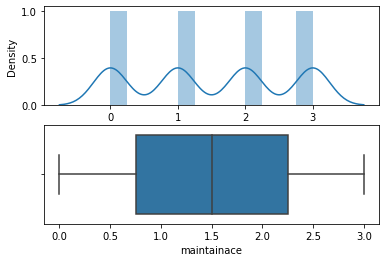

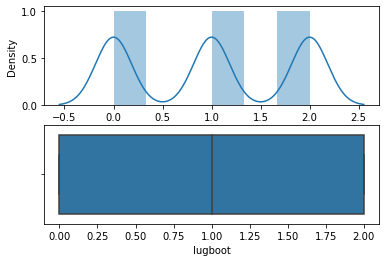

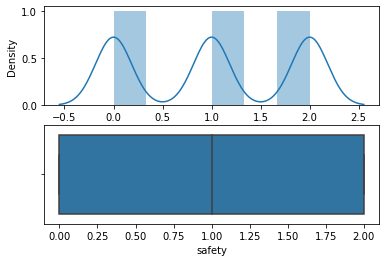

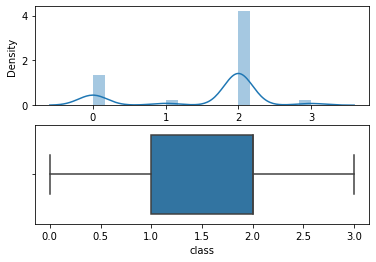

In [63]:
for i in cat_col:
    plot(categorical_data,i)

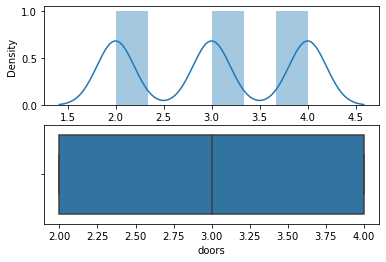

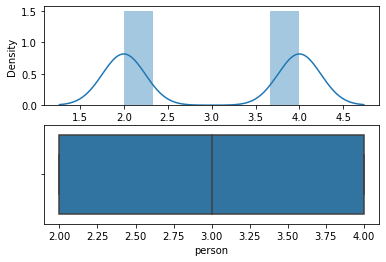

In [65]:
for i in num_col:
    plot(df,i)

In [66]:
data_frame = pd.concat([categorical_data,df[num_col]],axis=1)

In [67]:
data_frame.head()

,buying,maintainace,lugboot,safety,class,doors,person
0,3,3,2,1,2,2.0,2.0
1,3,3,2,2,2,2.0,2.0
2,3,3,2,0,2,2.0,2.0
3,3,3,1,1,2,2.0,2.0
4,3,3,1,2,2,2.0,2.0


In [69]:
x = data_frame.drop('class',axis=1)
y = data_frame['class']

In [70]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

In [71]:
#split the data
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [73]:
from xgboost import XGBClassifier

In [74]:
classifier = XGBClassifier()

In [75]:
params = {
    'learning_rate':[0.05,0.2,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytress':[0.3,0.4,0.7]
}

In [76]:
#cross validator
from sklearn.model_selection import RandomizedSearchCV

In [77]:
random_search =  RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [78]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:27:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytress } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [79]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytress=0.3,
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=10, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytress=0.3,
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=10, min_child_weight=7,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
classifier.fit(X_train,y_train)

[19:28:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytress } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:28:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytress=0.3,
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=10, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
ypred = classifier.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
accuracy_score(y_test,ypred)

0.9754816112084063

In [86]:
confusion_matrix(y_test,ypred)

array([[120,   8,   1,   0],
       [  1,  19,   0,   0],
       [  1,   0, 396,   0],
       [  2,   1,   0,  22]], dtype=int64)